# K-means 範例

- 範例目標：讓同學了解如何使用 sklearn 執行 k-means
- 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
# !pip3 install --user sklearn
# !pip3 install --user --upgrade matplotlib

  Using cached https://files.pythonhosted.org/packages/11/0f/e2279fee7f9834c63b24fe64515412fd21dd81e82adcf6c79dcc93bb8e6a/scikit_learn-0.20.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/6c/ccf7403d14f0ab0f20ce611696921f204f4ffce99a4fd383c892a6a7e9eb/scipy-1.2.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/site-packages (3.0.2)


載入套件

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

載入 toy example 資料集

In [13]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

設定 模型 估計參數

In [14]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

In [17]:
est = KMeans(n_clusters=8)
est.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
est.labels_

array([5, 7, 7, 1, 2, 7, 5, 3, 6, 3, 4, 6, 1, 6, 7, 4, 3, 6, 6, 7, 3, 3,
       1, 1, 6, 2, 5, 4, 2, 6, 5, 0, 5, 4, 6, 4, 2, 2, 0, 6, 4, 7, 3, 4,
       5, 3, 5, 5, 4, 1, 7, 0, 4, 7, 7, 7, 7, 4, 6, 3, 1, 0, 6, 4, 0, 4,
       7, 6, 1, 3, 0, 4, 4, 4, 1, 7, 6, 1, 5, 7, 4, 5, 4, 7, 2, 1, 2, 1,
       4, 4, 4, 2, 3, 0, 4, 6, 2, 1, 5, 6])

In [22]:
X

array([[  0.70078428,   2.44692058,   4.95021256,   2.47984816],
       [ -0.85514846,   1.15417531,   5.19562704,  -0.43938334],
       [ -1.26134972,   0.89859695,   4.70758977,   0.89305402],
       [ -5.01121552,  -7.07256285,  -7.12710102,   3.62991567],
       [ -7.8957584 ,   6.24736767,  -5.40795882,  10.61018377],
       [  0.24456995,   1.82069899,   4.05407379,  -0.2048558 ],
       [  0.97660185,   2.92813096,   5.15179652,   1.72147287],
       [ -5.06657892,   7.91513345,  -5.07319428,   8.54298261],
       [ -5.96912892,   6.65981553,  -6.27313606,   7.5595934 ],
       [ -6.13764981,   8.56685089,  -5.97278088,  10.63232493],
       [ -4.71105845,  -5.76686937,  -8.24434747,   4.55880732],
       [ -6.15353935,   8.20288407,  -6.31104688,   7.89009797],
       [ -2.44701116,  -7.97662905,  -7.04122849,   5.0303455 ],
       [ -4.34785317,   6.77999362,  -7.4653154 ,   9.24937097],
       [ -0.84229262,   0.53099185,   5.51259451,   0.39660101],
       [ -3.11364526,  -5

In [21]:
X[:, 3]

array([ 2.47984816, -0.43938334,  0.89305402,  3.62991567, 10.61018377,
       -0.2048558 ,  1.72147287,  8.54298261,  7.5595934 , 10.63232493,
        4.55880732,  7.89009797,  5.0303455 ,  9.24937097,  0.39660101,
        4.14430253,  9.83742304,  7.62431237,  7.515365  ,  1.20095337,
        9.66418154,  9.09917142,  4.33961593,  4.38147456,  8.27115055,
        7.94518677,  1.84120449,  4.38958094,  9.08463943,  8.27160381,
        0.78203857,  0.6557634 , -0.20172989,  6.05525166,  7.67939182,
        5.86557065, 10.22954917,  8.17009998, -0.78318449,  7.68265293,
        5.84743406,  0.12837802,  9.08201602,  5.13989287,  1.26776522,
        9.34439747,  0.75878037,  0.66658688,  6.62452033,  4.98336991,
        0.78755752, -0.05723237,  3.77603648,  0.40300363,  0.89999348,
       -0.75004667,  0.08086315,  4.81959257,  8.67586662,  9.4335696 ,
        4.78142943, -2.01833799,  7.66105493,  4.73159766,  0.81131602,
        5.77971466, -0.23862978,  8.26628772,  4.40761174,  7.89

資料建模 並 視覺化 結果

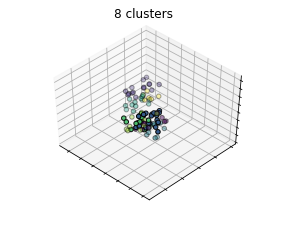

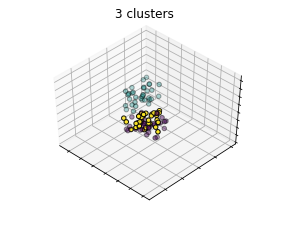

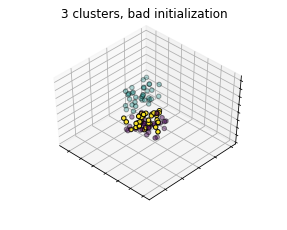

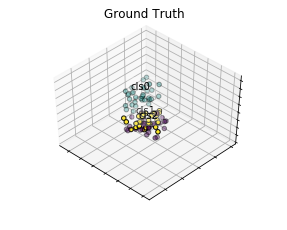

In [15]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

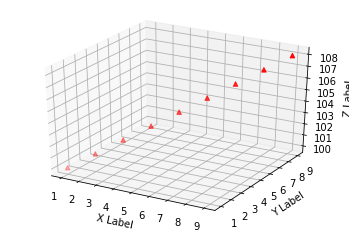

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().add_subplot(111, projection = '3d')
xs = np.arange(1, 10)
ys = np.arange(1, 10)
zs = np.arange(100, 109)
#基於ax變數繪製三維圖
#xs表示x方向的變數
#ys表示y方向的變數
#zs表示z方向的變數，這三個方向上的變數都可以用list的形式表示
#m表示點的形式，o是圓形的點，^是三角形（marker)
#c表示顏色（color for short）
ax.scatter(xs, ys, zs, c = 'r', marker = '^') #點為紅色三角形
 
#設定座標軸
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
#顯示影象
plt.show()
